#**Comparing Litecoin (LTC) and Dash (DASH): Unleashing the Potential of Payment-Oriented Cryptocurrencies through On-Chain Analysis**

Litecoin (LTC) and Dash (DASH) are prominent cryptocurrencies that have made significant strides in facilitating fast and cost-effective payments. LTC, often seen as the "silver to Bitcoin's gold," offers quick block generation and low-cost transactions. In contrast, Dash positions itself as a privacy-centric currency, emphasizing instant and secure transactions. Despite its lower market cap, Dash's innovative features and decentralized governance make it an intriguing contender to Litecoin's dominance in the payment-focused cryptocurrency space.

By conducting a focused comparative analysis of LTC and DASH, we aim to uncover the factors that make them both compelling and distinct within the evolving cryptocurrency landscape. Through an exploration of their On-Chain data, we gain valuable insights into the transformative potential held by these digital currencies in reshaping financial transactions.

This paper presents a concise comparative analysis of LTC and DASH, highlighting their shared focus on seamless payments. Despite its lower market cap, Dash's unique features and governance model position it as a compelling challenger to Litecoin.



> **Does Dash represent a serious competitor to LTC in the domain of payment-centric cryptocurrencies?**




## **Load packages and data, define the  functions**

The first step in our analysis is to load the necessary packages and retrieve the data for LTC and DASH. We will be utilizing the CryptoCompare API for this purpose.

To begin, we need to ensure that the required packages are installed in our Python environment.

Once the package is installed, we can proceed to import the necessary libraries and retrieve the data.

###**Install the needed packages**

In [2]:
!pip install cryptocompare
!pip install yfinance
!pip install robin-stocks

  Preparing metadata (setup.py) ... done
  Created wheel for cryptocompare: filename=cryptocompare-0.7.6-py3-none-any.whl size=6290 sha256=a6de0841691fafbed560210fe401a9108e306f93c6eda7a378d21793151d43ea
  Stored in directory: /root/.cache/pip/wheels/97/81/6a/261bc499b9d9bf8b391eea52c90a4746b477539564b0a66c94
Successfully built cryptocompare
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 44.9 MB/s eta 0:00:00


###**Import the needed packages**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime
import seaborn as sns
sns.set_style('white', {'axes.spines.right': True, 'axes.spines.top': False})
import cryptocompare as cc
import yfinance as yf
import requests
import IPython
import yaml
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Define the needed functions**

In [6]:
# Generic function for an API call to a given URL
def api_call(url):
  # Set API Key as Header
  headers = {'authorization': 'Apikey ' + api_key,}
  session = requests.Session()
  session.headers.update(headers)

  # API call to cryptocompare
  response = session.get(url)

  # Conversion of the response to dataframe
  historic_blockdata_dict = json.loads(response.text)
  df = pd.DataFrame.from_dict(historic_blockdata_dict.get('Data').get('Data'), orient='columns', dtype=None, columns=None)
  return df

# This function prepares the data for proper treatment
def prepare_pricedata(df):
  df['date'] = pd.to_datetime(df['time'], unit='s')
  df.drop(columns=['time', 'conversionType', 'conversionSymbol'], inplace=True)
  return df

# This function adds bitcoin halving dates as vertical lines
def add_halving_dates(ax, df_x_dates, df_ax1_y):
    halving_dates = ['2009-01-03', '2012-11-28', '2016-07-09', '2020-05-11', '2024-03-12', '2028-06-01']
    dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in halving_dates]
    for i, datex in enumerate(dates_list):
        halving_ts = pd.Timestamp(datex)
        x_max = df_x_dates.max() + timedelta(days=365)
        x_min = df_x_dates.min() - timedelta(days=365)
        if (halving_ts < x_max) and (halving_ts > x_min):
            ax.axvline(x=datex, color = 'purple', linewidth=1, linestyle='dashed')
            ax.text(x=datex  + timedelta(days=20), y=df_ax1_y.max()*0.99, s='BTC Halving ' + str(i) + '\n' + str(datex), color = 'purple')

# This function creates a nice legend for twinx plots
def add_twinx_legend(ax1, ax2, x_anchor=1.18, y_anchor=1.0):
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc=1, facecolor='white', framealpha=0, bbox_to_anchor=(x_anchor, y_anchor))
    ax2.get_legend().remove()

def create_lineplot(coin_a_price_df, coin_b_price_df,coin_a,coin_b):
  fig, ax1 = plt.subplots(figsize=(16, 6))
  sns.lineplot(data=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close', color='cornflowerblue', linewidth=0.5, label=f'{coin_a} close price', ax=ax1)
  sns.lineplot(data=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close_avg', color='blue', linestyle='dashed', linewidth=1.0,
      label=f'{coin_a} {rolling_window}-MA', ax=ax1)
  ax1.set_ylabel(f'{coin_a} Prices')
  ax1.set(xlabel=None)
  ax2 = ax1.twinx()
  sns.lineplot(data=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close', color='lightcoral', linewidth=0.5, label=f'{coin_b} close price', ax=ax2)
  sns.lineplot(data=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2020,1,1)], x='date', y='close_avg', color='red', linestyle='dashed', linewidth=1.0,
      label=f'{coin_b} {rolling_window}-MA', ax=ax2)
  ax2.set_ylabel(f'{coin_b} Prices')
  add_twinx_legend(ax1, ax2, 0.98, 0.2)
  #add_halving_dates(ax1, coin_a_price_df.date, coin_a_price_df.close)
  #ax1.set_yscale('log'), ax2.set_yscale('log')
  plt.title(f'Prices of {coin_a} and {coin_b} since 2020')
  plt.show()

def compare_asset_performance(asset1_close_prices, asset2_close_prices, asset1, asset2):
    # Calculate the returns
    asset1_returns = [(asset1_close_prices[i] - asset1_close_prices[i-1]) / asset1_close_prices[i-1] for i in range(1, len(asset1_close_prices))]
    asset2_returns = [(asset2_close_prices[i] - asset2_close_prices[i-1]) / asset2_close_prices[i-1] for i in range(1, len(asset2_close_prices))]

    # Calculate cumulative returns
    asset1_cum_returns = [1]
    asset2_cum_returns = [1]

    for i in range(len(asset1_returns)):
        asset1_cum_returns.append(asset1_cum_returns[i] * (1 + asset1_returns[i]))
        asset2_cum_returns.append(asset2_cum_returns[i] * (1 + asset2_returns[i]))

    # Create the plot
    plt.figure(figsize=(16, 6))
    plt.plot(asset1_close_prices.index, asset1_cum_returns, label=asset1)
    plt.plot(asset2_close_prices.index, asset2_cum_returns, label=asset2)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Returns')
    plt.title('Comparison of Asset Performances')
    plt.legend()
    plt.grid(True)
    plt.show()

def zoom_compare(coin_a_price_df, coin_b_price_df,coin_a,coin_b):

  # Create the subplot grid
  fig = make_subplots(rows=1, cols=2, shared_xaxes=True)

  # Add the first line plot for coin_a_price_df
  fig.add_trace(go.Scatter(
      x=coin_a_price_df['date'][coin_a_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2023,1,1)]['close'],
      mode='lines',
      name=f'{coin_a} close price',
      line=dict(color='cornflowerblue', width=0.5)
  ), row=1, col=1)

  fig.add_trace(go.Scatter(
      x=coin_a_price_df['date'][coin_a_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_a_price_df[coin_a_price_df['date'] > pd.Timestamp(2023,1,1)]['close_avg'],
      mode='lines',
      name=f'{coin_a} {rolling_window}-MA',
      line=dict(color='blue', width=1.0, dash='dash')
  ), row=1, col=1)

  # Set the y-axis label for the first line plot
  fig.update_yaxes(title_text=f'{coin_a} Prices', secondary_y=False, row=1, col=1)

  # Add the second line plot for coin_b
  fig.add_trace(go.Scatter(
      x=coin_b_price_df['date'][coin_b_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2023,1,1)]['close'],
      mode='lines',
      name=coin_b+' close price',
      line=dict(color='lightcoral', width=0.5)
  ), row=1, col=2)

  fig.add_trace(go.Scatter(
      x=coin_b_price_df['date'][coin_b_price_df['date'] > pd.Timestamp(2023,1,1)],
      y=coin_b_price_df[coin_b_price_df['date'] > pd.Timestamp(2023,1,1)]['close_avg'],
      mode='lines',
      name=f'{coin_b} {rolling_window}-MA',
      line=dict(color='red', width=1.0, dash='dash')
  ), row=1, col=2)

  # Set the y-axis label for the second line plot
  fig.update_yaxes(title_text=coin_b+ ' Prices', secondary_y=False, row=1, col=2)

  # Set the title of the plot
  fig.update_layout(title_text=f'Prices of {coin_a} and '+ coin_b)

  # Show the plot
  fig.show()

  # Prepare the onchain dataframe
def prepare_onchain_data(df):
  # replace the timestamp with a data and filter some faulty values
  df['date'] = pd.to_datetime(df['time'], unit='s')
  df.drop(columns='time', inplace=True)
  df = df[df['hashrate'] > 0.0]
  return df

def prepare_balancedistribution_data(df):
  df['balance_distribution'] = df['balance_distribution'].apply(lambda x: [i for i in x])
  json_struct = json.loads(df[['time','balance_distribution']].to_json(orient="records"))
  df_ = pd.json_normalize(json_struct)
  df_['date'] = pd.to_datetime(df_['time'], unit='s')
  df_flat = pd.concat([df_.explode('balance_distribution').drop(['balance_distribution'], axis=1),
           df_.explode('balance_distribution')['balance_distribution'].apply(pd.Series)], axis=1)
  df_flat.reset_index(drop=True, inplace=True)
  df_flat['range'] = ['' + str(float(df_flat['from'][x])) + '_to_' + str(float(df_flat['to'][x])) for x in range(df_flat.shape[0])]
  df_flat.drop(columns=['from','to', 'time'], inplace=True)

  # Data cleansing
  df_flat = df_flat[~df_flat['range'].isin(['100000.0_to_0.0'])]
  df_flat['range'].iloc[df_flat['range'] == '1e-08_to_0.001'] = '0.0_to_0.001'
  return df_flat

###**Import the data**

In [7]:
# Set the API Key from a yaml file
yaml_file = open('/content/drive/My Drive/Colab Notebooks/On-chain analysis/api_config_cryptocompare.yml', 'r')
p = yaml.load(yaml_file, Loader=yaml.FullLoader)
api_key = p['api_key']
# alternatively if you have not stored your API key in a separate file
# api_key = your key

# Number of past days for which we retrieve data
data_limit = 2000

# Define coin symbols, here we use BTC
symbol_a = 'LTC'
symbol_b = 'DASH'

# Load the price data
base_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym='
df_a = api_call(f'{base_url}{symbol_a}&tsym=USD&limit={data_limit}')
coin_a_price_df = prepare_pricedata(df_a)
df_b = api_call(f'{base_url}{symbol_b}&tsym=USD&limit={data_limit}')
coin_b_price_df = prepare_pricedata(df_b)

rolling_window = 25
coin_a_price_df['close_avg'] = coin_a_price_df['close'].rolling(window=rolling_window).mean()
coin_b_price_df['close_avg'] = coin_b_price_df['close'].rolling(window=rolling_window).mean()

# Load the balance distribution data for Bitcoin
base_url = 'https://min-api.cryptocompare.com/data/blockchain/balancedistribution/histo/day?fsym='
df_raw = api_call(f'{base_url}{symbol_a}&limit={data_limit}')

In [9]:
# Load onchain data for Bitcoin
base_url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym='
df_a = api_call(f'{base_url}{symbol_a}&limit={data_limit}')
onchain_symbol_a_df = prepare_onchain_data(df_a)

# Load onchain data for Ethereum
df_b = api_call(f'{base_url}{symbol_b}&limit={data_limit}')
onchain_symbol_b_df = prepare_onchain_data(df_b)


## **Analyzing the Data**

### **Price Analysis**

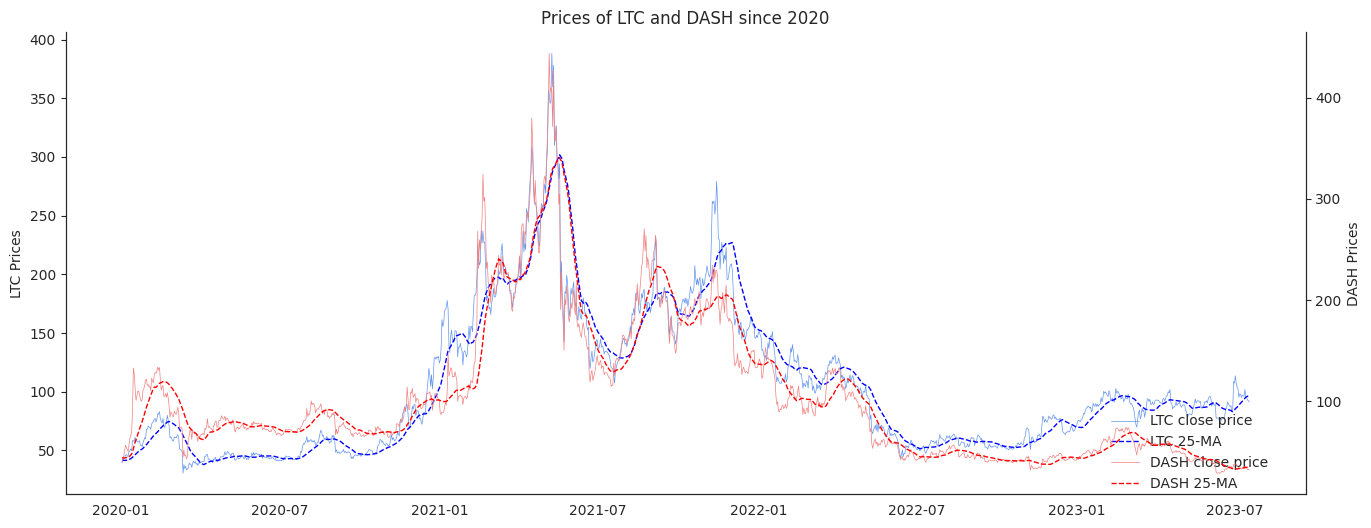

In [8]:
create_lineplot(coin_a_price_df,coin_b_price_df,symbol_a,symbol_b)

Since the beginning of 2020, both Litecoin (LTC) and Dash (DASH) have exhibited strikingly similar price fluctuations, reflecting their correlation within the dynamic cryptocurrency market. As payment-oriented cryptocurrencies, LTC and DASH have experienced price movements that echo the broader trends of the digital asset space. Throughout the past years, both assets have undergone periods of notable volatility, with surges and corrections impacting their respective values. Observing their price charts side by side reveals a parallel trajectory, indicating that external factors influencing the broader cryptocurrency market may play a significant role in driving the price movements of these payment-focused assets.

### **Correlation Analysis**

Text(0.5, 1.0, 'LTC-DASH correlation (rolling window=100)')

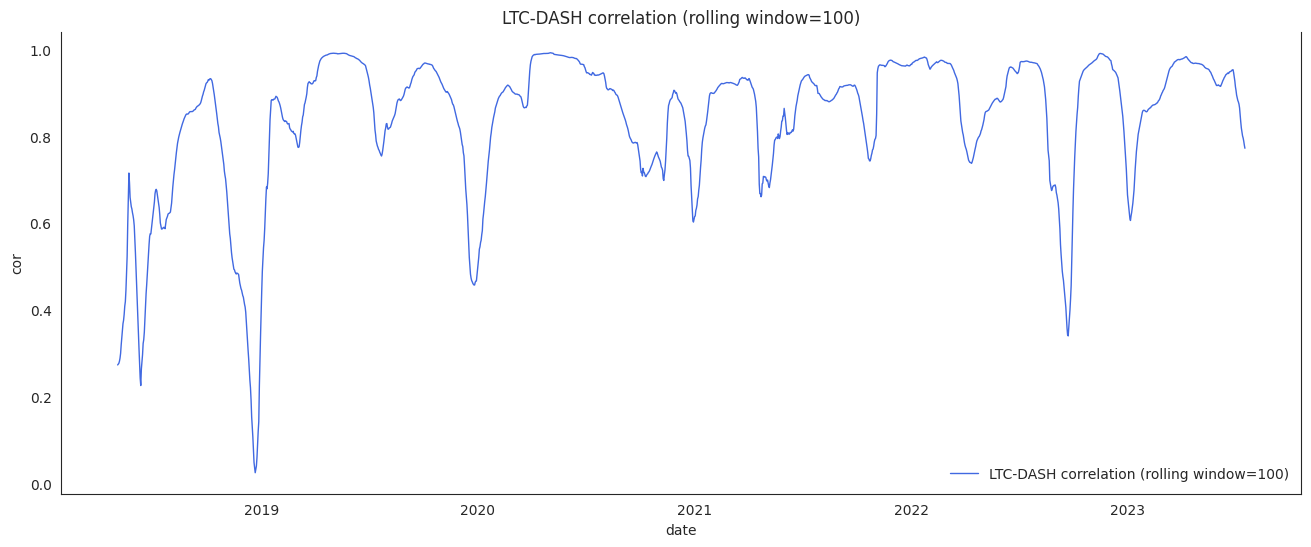

In [10]:
# Calculate the Rolling Correlation Coefficient
rolling_window = 100 #days

# Generate a work dataframe that includes closing prices and date
df_price_merged = pd.DataFrame.from_dict(data={f'close_{symbol_b}': coin_b_price_df['close'], f'close_{symbol_a}': coin_a_price_df['close'], 'date': coin_a_price_df['date']})
# Create the rolling correlation dataframe
df_temp = pd.DataFrame({'cor': coin_b_price_df.close.rolling(rolling_window).corr(coin_a_price_df.close).dropna()})
# Reverse the index and join the df to create a date index
df_cor_dateindex = df_price_merged.join(df_temp[::-1].set_index(df_temp.index)).dropna().set_index('date')

# Create the plot
fig, ax1 = plt.subplots(figsize=(16, 6))
label = f'{symbol_a}-{symbol_b} correlation (rolling window={rolling_window})'
sns.lineplot(data=df_cor_dateindex, x=df_cor_dateindex.index, y='cor', color='royalblue', linewidth=1.0, label=label)
plt.legend(framealpha=0)
plt.title(label)

Now let's try to confirm this by analyzing the correlation. Conducting a correlation analysis between Litecoin (LTC) and Dash (DASH) since 2020 reveals interesting patterns in their price movements. Over the observed period, there has been a noticeable reduction in volatility in their correlation, indicating a growing convergence in their price behaviors. This reduced volatility suggests that, despite their individual nuances, the two payment-focused cryptocurrencies have become increasingly influenced by similar market factors and trends. Moreover, the analysis also highlights a sustained positive correlation over a more extended duration, signifying a consistent tendency for LTC and DASH to move in tandem. This prolonged positive correlation suggests that market sentiment and broader macroeconomic conditions might be exerting a significant impact on both assets, fostering a continued link between their price movements.

### **Active Addresses & Number of transactions**

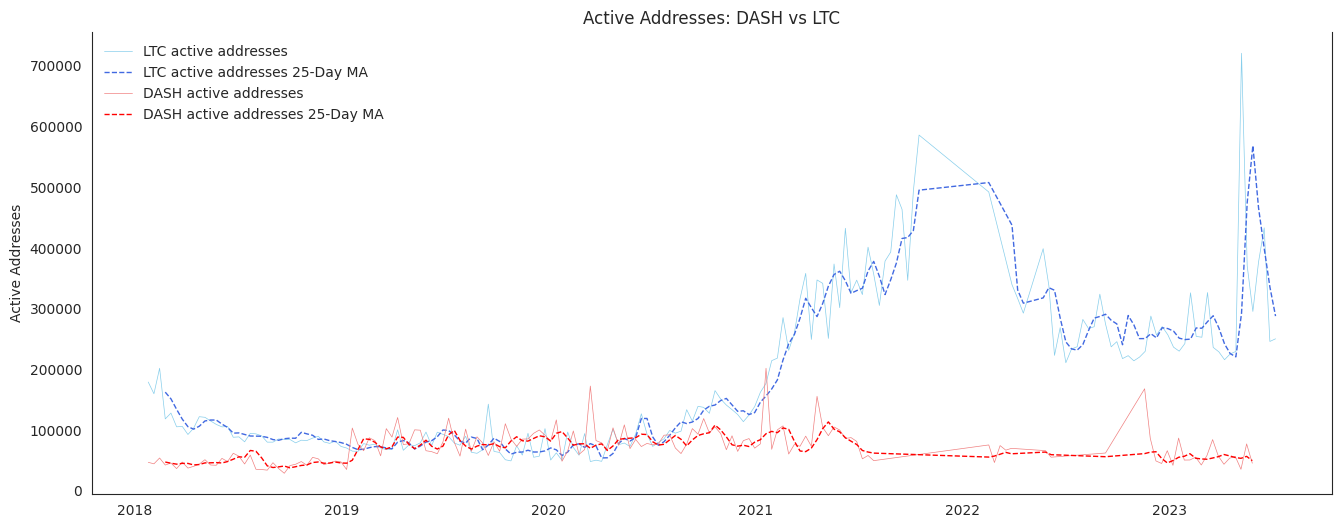

In [11]:
rolling_window=25
y_a_add_ma = onchain_symbol_a_df['active_addresses'].rolling(window=rolling_window).mean()
y_b_add_ma = onchain_symbol_b_df['active_addresses'].rolling(window=rolling_window).mean()

# Lineplot: Active Addresses
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=onchain_symbol_a_df[-1*data_limit::10], x='date', y='active_addresses',
    linewidth=0.5, color='skyblue', ax=ax1, label=f'{symbol_a} active addresses')
sns.lineplot(data=onchain_symbol_a_df[-1*data_limit::10], x='date', y=y_a_add_ma,
    linewidth=1.0, color='royalblue', linestyle='--', ax=ax1, label=f'{symbol_a} active addresses {rolling_window}-Day MA')
sns.lineplot(data=onchain_symbol_b_df[-1*data_limit::10], x='date', y='active_addresses',
    linewidth=0.5, color='lightcoral', ax=ax1, label=f'{symbol_b} active addresses')
sns.lineplot(data=onchain_symbol_b_df[-1*data_limit::10], x='date', y=y_b_add_ma,
    linewidth=1.0, color='red', linestyle='--', ax=ax1, label=f'{symbol_b} active addresses {rolling_window}-Day MA')
ax1.set(xlabel=None)
ax1.set(ylabel='Active Addresses')
plt.title(f'Active Addresses: {symbol_b} vs {symbol_a}')
plt.legend(framealpha=0)
plt.show()

The disparity in the number of active addresses between Litecoin (LTC) and Dash (DASH) unveils interesting dynamics within their respective ecosystems. While both cryptocurrencies experienced a period of relatively similar activity in late 2019 and early 2020, a notable shift occurred after 2021. During this period, Dash briefly exhibited a slightly higher number of active addresses, indicating increased user engagement within its network. However, since then, Litecoin has taken a significant lead, boasting a substantially larger number of active addresses compared to Dash. This remarkable surge in Litecoin's user activity might be attributed to several factors, such as increased adoption by merchants and users, growing interest from institutional investors, and the development of decentralized applications (DApps) on its platform. On the other hand, Dash's comparatively lower number of active addresses may reflect varying levels of community engagement, differing adoption rates, and unique features or use cases attracting distinct user demographics.

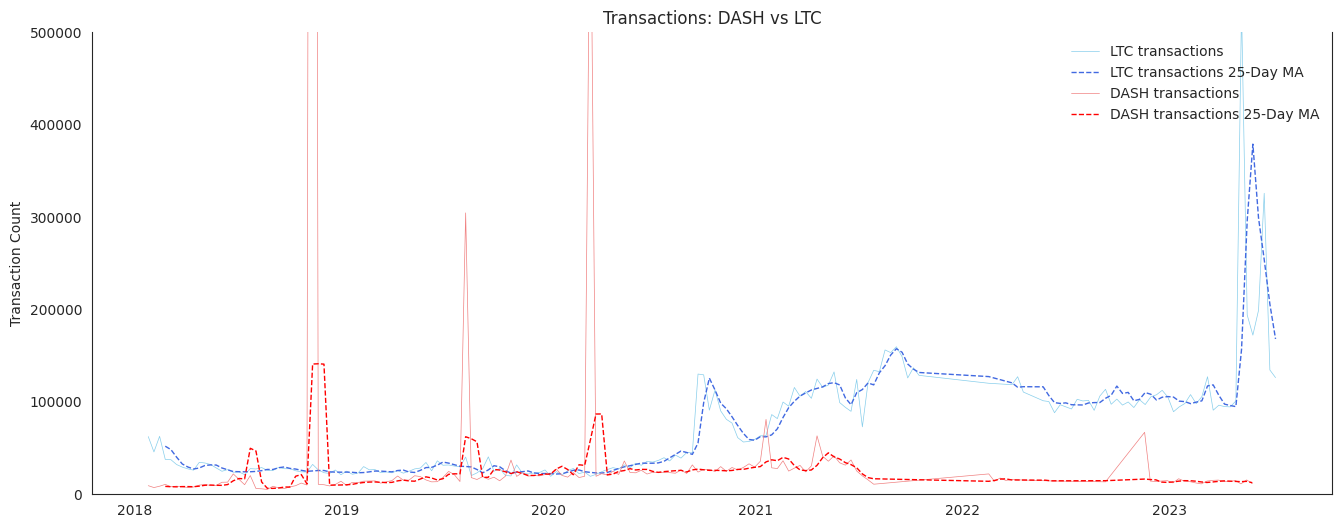

In [12]:
# Calculate Transaction Count Moving Averages
rolling_window=25
y_a_trx_ma = onchain_symbol_a_df['transaction_count'].rolling(window=rolling_window).mean()
y_b_trx_ma = onchain_symbol_b_df['transaction_count'].rolling(window=rolling_window).mean()

# Lineplot: Transactions Count
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=onchain_symbol_a_df[-1*data_limit::10], x='date', y='transaction_count',
    linewidth=0.5, color='skyblue', ax=ax1, label=f'{symbol_a} transactions')
sns.lineplot(data=onchain_symbol_a_df[-1*data_limit::10], x='date', y=y_a_trx_ma,
    linewidth=1.0, color='royalblue', linestyle='--', ax=ax1, label=f'{symbol_a} transactions {rolling_window}-Day MA')
sns.lineplot(data=onchain_symbol_b_df[-1*data_limit::10], x='date', y='transaction_count',
    linewidth=0.5, color='lightcoral', ax=ax1, label=f'{symbol_b} transactions')
sns.lineplot(data=onchain_symbol_b_df[-1*data_limit::10], x='date', y=y_b_trx_ma,
    linewidth=1.0, color='red', linestyle='--', ax=ax1, label=f'{symbol_b} transactions {rolling_window}-Day MA')
ax1.set(xlabel=None)
ax1.set(ylabel='Transaction Count')
ax1.set_ylim([-10, 0.5e6])
plt.legend(framealpha=0)
plt.title(f'Transactions: {symbol_b} vs {symbol_a}')
plt.show()


Comparing the number of transactions between Litecoin (LTC) and Dash (DASH) further illuminates the divergent paths these payment-focused cryptocurrencies have taken in recent times. In the period between late 2019 and early 2020, Dash exhibited a slightly higher number of transactions, indicating a heightened level of activity within its network during that phase. However, as the cryptocurrency landscape evolved, Litecoin experienced a substantial surge in the number of transactions, surpassing Dash and maintaining a notably higher transaction volume since 2021.

### **Difficulty & Hashrate**

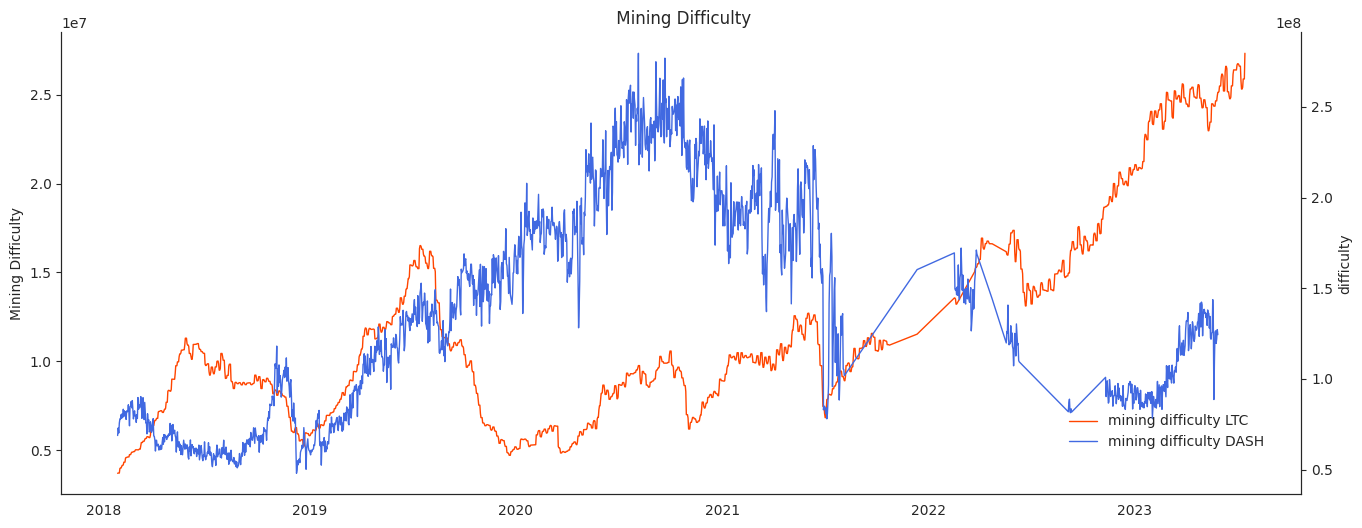

In [28]:
# Add a moving average
rolling_window = 25
coin_a_price_df['close_avg'] = coin_a_price_df['close'].rolling(window=rolling_window).mean()
# Creating a Lineplot: Mining Difficulty vs Price
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=onchain_symbol_a_df, x='date', y='difficulty', linewidth=1.0, color='orangered', ax=ax1, label=f'mining difficulty {symbol_a}')

coin_b_price_df['close_avg'] = coin_b_price_df['close'].rolling(window=rolling_window).mean()
# Creating a Lineplot: Mining Difficulty vs Price
ax2 = ax1.twinx()
sns.lineplot(data=onchain_symbol_b_df, x='date', y='difficulty', linewidth=1.0, color='royalblue', ax=ax2, label=f'mining difficulty {symbol_b}')

add_twinx_legend(ax1, ax2, 0.98, 0.2)
#add_halving_dates(ax1, onchain_symbol_a_df.date, onchain_symbol_a_df.hashrate)
ax1.set(xlabel=None)
ax1.set(ylabel='Mining Difficulty')
plt.title(f' Mining Difficulty')
plt.show()

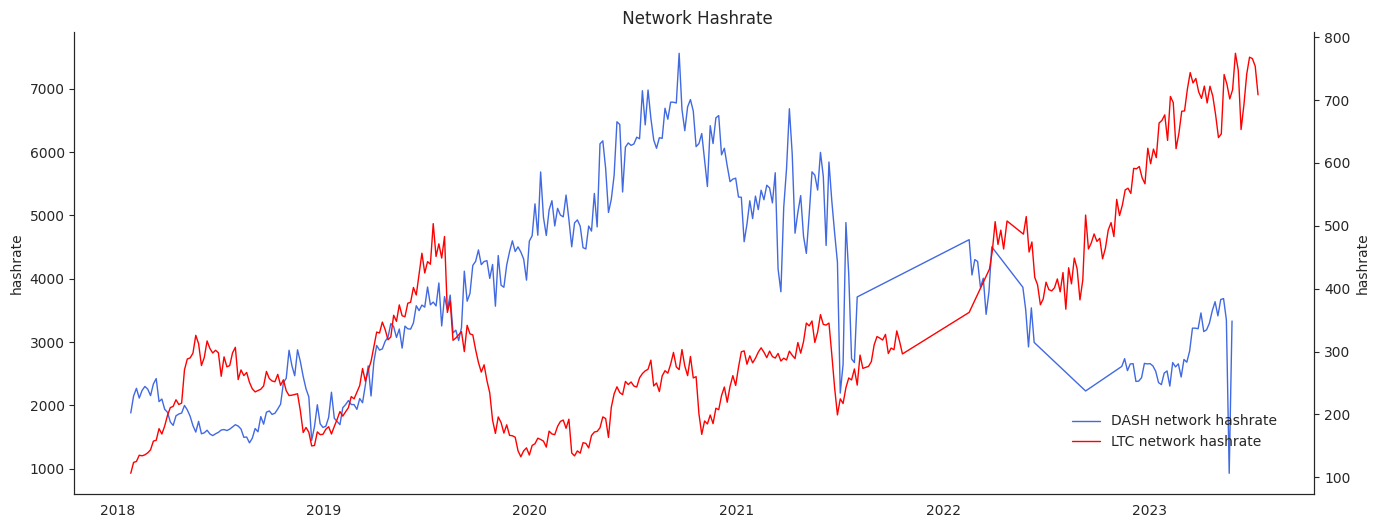

In [29]:
# Lineplot: Difficulty vs Hashrate
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=onchain_symbol_b_df[::5], x='date', y='hashrate',
    linewidth=1.0, color='royalblue', ax=ax1, label=f'{symbol_b} network hashrate')
ax2 = ax1.twinx()
sns.lineplot(data=onchain_symbol_a_df[::5], x='date', y='hashrate',
    linewidth=1.0, color='red', ax=ax2, label=f'{symbol_a} network hashrate')
add_twinx_legend(ax1, ax2, 0.98, 0.2)
#add_halving_dates(ax1, onchain_symbol_a_df.date, onchain_symbol_a_df.difficulty)
ax1.set(xlabel=None)
plt.title(f' Network Hashrate')
plt.show()


The mining difficulty and hashrate trends of Litecoin (LTC) and Dash (DASH) reveal intriguing shifts in the mining landscape for these cryptocurrencies. Between 2018 and 2019, both coins displayed parallel trends, with Litecoin generally experiencing slightly higher values in mining difficulty and hashrate. This indicates comparable mining activity, with Litecoin maintaining a slightly higher network security during that period.

From 2019 until the end of 2020, the trends continued in tandem, suggesting that the mining ecosystems of LTC and DASH remained relatively balanced. However, starting in mid-2021, Dash's mining difficulty and hashrate took a notable upswing, reaching significantly higher values. This substantial surge may have been influenced by factors such as increased miner participation, growing interest in Dash's privacy features, or specific mining-related incentives within the Dash community.

Interestingly, this surge in Dash's mining metrics was followed by a sharp decline. The mid-2021 collapse in Dash's mining difficulty and hashrate could be attributed to various factors, including changes in market sentiment, regulatory developments, or shifts in miner profitability.

In contrast, since early 2022, Litecoin's mining difficulty and hashrate have surpassed Dash's values, signifying a shift in mining interest towards Litecoin. This trend could be indicative of Litecoin's appeal to miners as a stable and long-standing cryptocurrency, along with its widespread recognition and adoption.

Examining the fluctuations in mining difficulty and hashrate provides valuable insights into the mining communities' sentiments and strategies towards Litecoin and Dash. As both cryptocurrencies continue to evolve, monitoring these metrics can offer valuable perspectives on their respective mining landscapes and network security levels.

## **Conclusion**

In conclusion, the comparative analysis of Litecoin (LTC) and Dash (DASH) reveals intriguing dynamics within the realm of payment-focused cryptocurrencies. Since 2020, both assets have exhibited similar price fluctuations, reflecting their correlation within the broader cryptocurrency market. However, significant differences have emerged in their number of active addresses, transaction volumes, and mining metrics, shedding light on the distinct paths they have taken.

Litecoin's sustained higher number of active addresses and transaction volumes post-2021 suggests increased user engagement and adoption, driven by factors such as merchant acceptance, institutional interest, and growing utility as a medium of exchange. Dash, although displaying a brief higher number of active addresses and transactions in the past, may have experienced varying levels of community engagement and targeted use cases.

Furthermore, Dash's surge and subsequent decline in mining difficulty and hashrate in mid-2021 signify potential fluctuations in miner interest, profitability, or shifts in market dynamics. In contrast, Litecoin's mining metrics surpassed Dash's values from early 2022, indicating a shift in mining interest towards Litecoin, possibly driven by its established reputation, stability, and widespread recognition.

Overall, the analysis portrays Litecoin as a prominent player in the payment-focused cryptocurrency landscape, displaying strong adoption, transactional activity, and mining interest. In contrast, Dash exhibits its unique strengths and challenges, with fluctuations in metrics hinting at varying market sentiments and mining community dynamics.

 Based on the analysis, Litecoin (LTC) exhibits stronger adoption, higher transaction volumes, and sustained mining interest, indicating its dominant position in the payment-focused cryptocurrency realm compared to Dash.

The comparative analysis underscores the significance of monitoring various factors when assessing cryptocurrency performance and potential. It also highlights the dynamic nature of the cryptocurrency market, wherein individual projects' fundamentals, community engagement, and macroeconomic conditions contribute to their unique trajectories.

As with any investment decision, comprehensive research, risk analysis, and vigilance in monitoring market trends are paramount to make informed choices in the ever-evolving world of cryptocurrencies.